# Table of Contents
<a id="toc"></a>
- [1. Project Description](#1)
- [2. Import Necssaries Libraries](#2)
- [3. Data Analysis](#3)
    - [3.1 Shape of the data](#3.1)
    - [3.2 Visualization](#3.2)
- [4. Feature Engineering](#4)
- [5. Assigning Feature and target variables](#5)
- [6. Feature Scaling](#6)
- [7. Spliting the data into Training and Testing Data](#7)
- [8. Modeling](#8)
    - [8.1 Logistic Regression](#8.1)
    - [8.2 Random Forest](#8.2)
    - [8.3 KNN](#8.3)
    - [8.4 Bagging](#8.4)
    - [8.5 Gradient Boosting](#8.5)
    - [8.6 Decision Tree](#8.6)
    - [8.7 SVM](#8.7)
- [9. TP, TN, FP, FN](#9)
    - [9.1 Logistic Regression](#9.1)
    - [9.2 Random Forest](#9.2)
    - [9.3 KNN](#9.3)
    - [9.4 Bagging](#9.4)
    - [9.5 Gradient Boosting](#9.5)
    - [9.6 Decision Tree](#9.6)
    - [9.7 SVM](#9.7)
- [10. Auto Machine Learning](#10)

<a id='2'></a>
# Import Necssaries Libraries

In [80]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import  confusion_matrix, classification_report, roc_curve, auc, RocCurveDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from tpot import TPOTClassifier
from sklearn.naive_bayes import MultinomialNB
import warnings
warnings.filterwarnings("ignore")

<a id='3'></a>
# EDA 

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
print(f"Data contains {df.shape[0]} rows and {df.shape[1]} columns")

Data contains 303 rows and 14 columns


In [5]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


the meaning of some of the column headers are not obvious. Here's what they mean,

age: The person's age in years<br>
sex: The person's sex (1 = male, 0 = female)<br>
cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)<br>
trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)<br>
chol: The person's cholesterol measurement in mg/dl<br>
fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)<br>
restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)<br>
thalach: The person's maximum heart rate achieved<br>
exang: Exercise induced angina (1 = yes; 0 = no)<br>
oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)<br>
slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)<br>
ca: The number of major vessels (0-4)<br>
thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)<br>
target: Heart disease (0 = no, 1 = yes)<br>


In [6]:
df2 = df.copy()

In [7]:
df2.columns = ['age', 'sex', 'chest_pain_type', 'resisting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 
               'rest_ecg', 'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression', 'st_slope', 
               'num_major_vessels', 'thalassemia', 'target']
df2.head(10)

,age,sex,chest_pain_type,resisting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [8]:
df2.nunique()

age                          41
sex                           2
chest_pain_type               4
resisting_blood_pressure     49
cholesterol                 152
fasting_blood_sugar           2
rest_ecg                      3
max_heart_rate_achieved      91
exercise_induced_angina       2
st_depression                40
st_slope                      3
num_major_vessels             5
thalassemia                   4
target                        2
dtype: int64

In [9]:
df2.sex.unique()

array([1, 0], dtype=int64)

In [10]:
df2.chest_pain_type.unique()

array([3, 2, 1, 0], dtype=int64)

In [11]:
df2.fasting_blood_sugar.unique()

array([1, 0], dtype=int64)

In [12]:
df2.rest_ecg.unique()

array([0, 1, 2], dtype=int64)

In [13]:
df2.exercise_induced_angina.unique()

array([0, 1], dtype=int64)

In [14]:
df2.st_slope.unique()

array([0, 2, 1], dtype=int64)

In [15]:
df2.num_major_vessels.unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [16]:
df2.thalassemia.unique()

array([1, 2, 3, 0], dtype=int64)

In [17]:
df2.target.unique()

array([1, 0], dtype=int64)

In [18]:
#change column values for better analysis
df2['sex'] = df2['sex'].replace(to_replace=[1,0], value=['male', 'female'])
df2['chest_pain_type'] = df2['chest_pain_type'].replace(to_replace =[0,1,2,3], value=['typical angina','atypical angina','non-anginal pain','asymptomatic'])
df2.fasting_blood_sugar = df2.fasting_blood_sugar.replace(to_replace=[0,1], value=['lower than 120mg/ml', 'higher than 120mg/ml'])
df2.rest_ecg = df2.rest_ecg.replace(to_replace=[0,1,2], value=['normal', 'ST-T wave abnormality', 'left ventricular hypertrophy'])
df2.exercise_induced_angina = df2.exercise_induced_angina.replace(to_replace=[0,1], value=['no', 'yes'])
df2.st_slope = df2.st_slope.replace(to_replace=[0,1,2], value=['upsloping', 'flat', 'downsloping'])
df2.thalassemia = df2.thalassemia.replace(to_replace=[1,2,3], value=['normal', 'fixed defect','reversable defect'])

In [19]:
df2.head()

,age,sex,chest_pain_type,resisting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,male,asymptomatic,145,233,higher than 120mg/ml,normal,150,no,2.3,upsloping,0,normal,1
1,37,male,non-anginal pain,130,250,lower than 120mg/ml,ST-T wave abnormality,187,no,3.5,upsloping,0,fixed defect,1
2,41,female,atypical angina,130,204,lower than 120mg/ml,normal,172,no,1.4,downsloping,0,fixed defect,1
3,56,male,atypical angina,120,236,lower than 120mg/ml,ST-T wave abnormality,178,no,0.8,downsloping,0,fixed defect,1
4,57,female,typical angina,120,354,lower than 120mg/ml,ST-T wave abnormality,163,yes,0.6,downsloping,0,fixed defect,1


In [20]:
df2.sex.value_counts()

male      207
female     96
Name: sex, dtype: int64

In [21]:
df2.chest_pain_type.value_counts()

typical angina      143
non-anginal pain     87
atypical angina      50
asymptomatic         23
Name: chest_pain_type, dtype: int64

In [22]:
df2.fasting_blood_sugar.value_counts()

lower than 120mg/ml     258
higher than 120mg/ml     45
Name: fasting_blood_sugar, dtype: int64

In [23]:
df2.rest_ecg.value_counts()

ST-T wave abnormality           152
normal                          147
left ventricular hypertrophy      4
Name: rest_ecg, dtype: int64

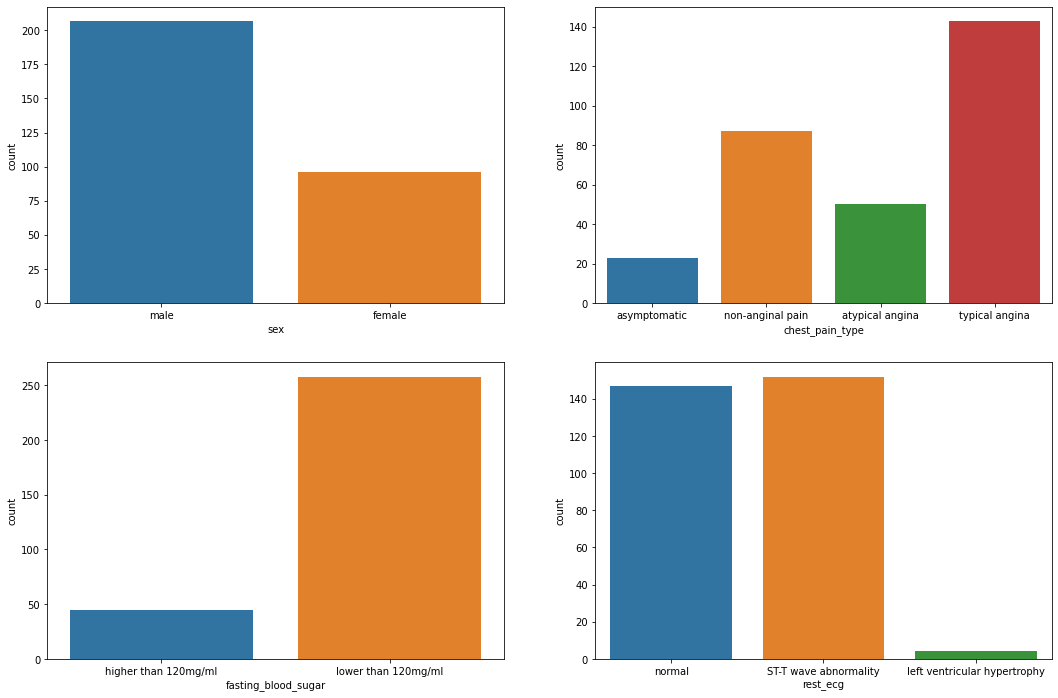

In [24]:
plt.figure(figsize=(18,12))

plt.subplot(2,2,1)
sns.countplot(x='sex', data=df2)

plt.subplot(2,2,2)
sns.countplot(x='chest_pain_type', data=df2)

plt.subplot(2,2,3)
sns.countplot(x='fasting_blood_sugar', data=df2)

plt.subplot(2,2,4)
sns.countplot(x='rest_ecg', data=df2)

plt.show()

- in sex column male has the majority in the data
- typical angina is most popular in chest pain type in the data
- most of the persons in the data has fasting blood sugar lower than 120mg/ml in the data
- normal and ST-T wave abnormality have the majority in Resting electrocardiographic measurement in the data

In [25]:
df2.rest_ecg.value_counts()

ST-T wave abnormality           152
normal                          147
left ventricular hypertrophy      4
Name: rest_ecg, dtype: int64

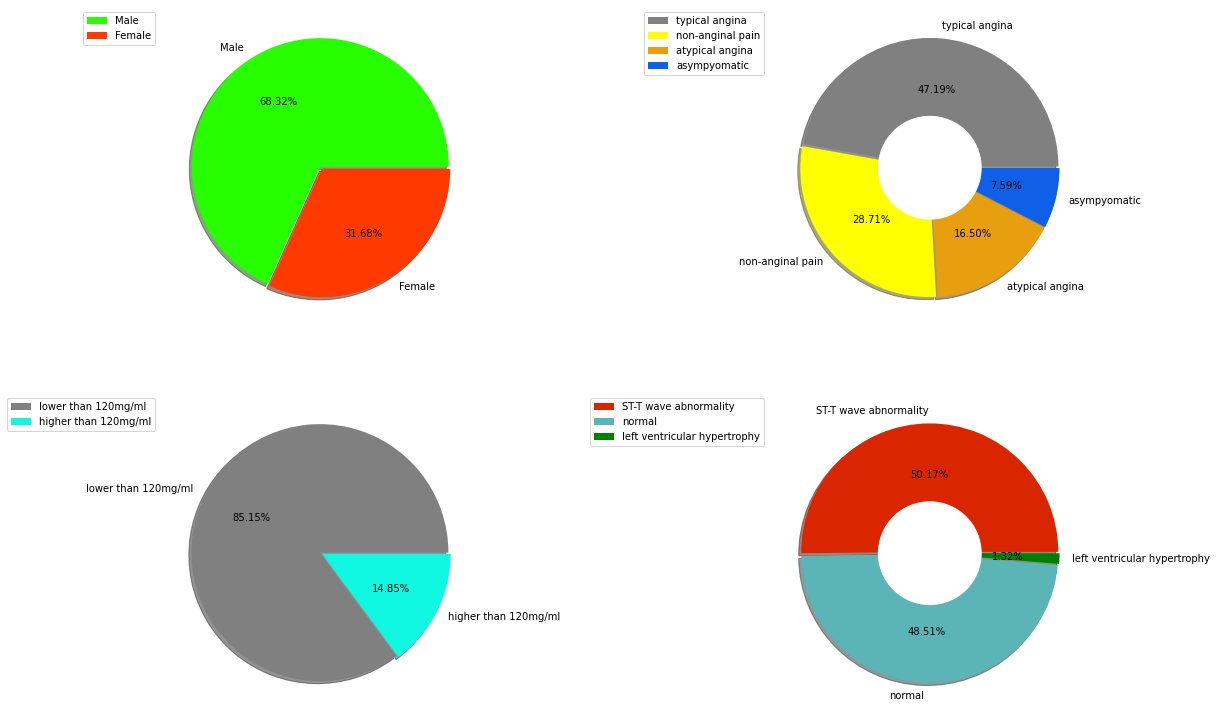

In [26]:
plt.figure(figsize=(20,13))

plt.subplot(2,2,1)
male = df2['sex'][df2['sex'] == 'male'].count()
female = df2['sex'][df2['sex'] == 'female'].count()
plt.pie([male, female], labels=['Male', 'Female'], autopct="%.2f%%", shadow=True, explode=[0.01,0.01], colors=['#27FF00', '#FF3A00'])
plt.legend(bbox_to_anchor=(0, 1))

plt.subplot(2,2,2)
ta = df2['chest_pain_type'][df2['chest_pain_type'] == 'typical angina'].count()
non_ap = df2['chest_pain_type'][df2['chest_pain_type'] == 'non-anginal pain'].count()
aa = df2['chest_pain_type'][df2['chest_pain_type'] == 'atypical angina'].count()
asym = df2['chest_pain_type'][df2['chest_pain_type'] == 'asymptomatic'].count()
weights = [ta, non_ap, aa, asym]
labels = ['typical angina', 'non-anginal pain', 'atypical angina', 'asympyomatic']
plt.pie(weights, labels=labels, autopct='%.2f%%', explode=(0.01,0.01,0.01,0.01), shadow=True, colors=['grey', 'yellow', '#E89F0F', '#0F60E7'])
my_circle = plt.Circle( (0,0), 0.4, color='white')
plt.gcf().gca().add_artist(my_circle)
plt.legend(bbox_to_anchor=(0, 1))


plt.subplot(2,2,3)
low = df2['fasting_blood_sugar'][df2['fasting_blood_sugar'] == 'lower than 120mg/ml'].count()
high = df2['fasting_blood_sugar'][df2['fasting_blood_sugar'] == 'higher than 120mg/ml'].count()
labels = ['lower than 120mg/ml', 'higher than 120mg/ml']
plt.pie([low, high], labels=labels, autopct="%.2f%%", shadow=True, explode=[0.01,0.01], colors=['grey', '#10F7E2'])
plt.legend(bbox_to_anchor=(0, 1))

plt.subplot(2,2,4)
st = df2['rest_ecg'][df2['rest_ecg'] == 'ST-T wave abnormality'].count()
normal = df2['rest_ecg'][df2['rest_ecg'] == 'normal'].count()
lvh = df2['rest_ecg'][df2['rest_ecg'] == 'left ventricular hypertrophy'].count()
weights = [st, normal, lvh]
labels = ['ST-T wave abnormality', 'normal', 'left ventricular hypertrophy']
plt.pie(weights, labels=labels, autopct='%.2f%%', explode=(0.01,0.01,0.01), shadow=True, colors=['#DA2600', '#5BB5B7', 'green'])
my_circle = plt.Circle( (0,0), 0.4, color='white')
plt.gcf().gca().add_artist(my_circle)
plt.legend(bbox_to_anchor=(0, 1))

plt.show()

In [27]:
df2.columns

Index(['age', 'sex', 'chest_pain_type', 'resisting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'rest_ecg',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression',
       'st_slope', 'num_major_vessels', 'thalassemia', 'target'],
      dtype='object')

In [28]:
df2.exercise_induced_angina.value_counts()

no     204
yes     99
Name: exercise_induced_angina, dtype: int64

In [29]:
df2.st_slope.value_counts()

downsloping    142
flat           140
upsloping       21
Name: st_slope, dtype: int64

In [30]:
df2.num_major_vessels.value_counts()

0    175
1     65
2     38
3     20
4      5
Name: num_major_vessels, dtype: int64

In [31]:
df2.thalassemia.value_counts()

fixed defect         166
reversable defect    117
normal                18
0                      2
Name: thalassemia, dtype: int64

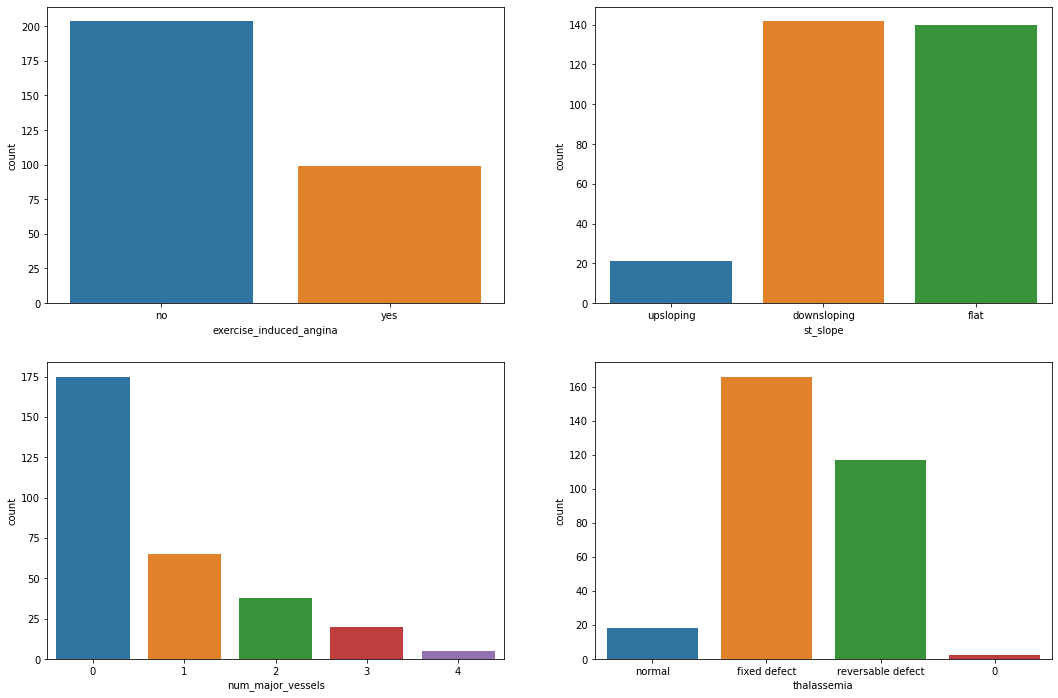

In [32]:
plt.figure(figsize=(18,12))

plt.subplot(2,2,1)
sns.countplot(x='exercise_induced_angina', data=df2)

plt.subplot(2,2,2)
sns.countplot(x='st_slope', data=df2)

plt.subplot(2,2,3)
sns.countplot(x='num_major_vessels', data=df2)

plt.subplot(2,2,4)
sns.countplot(x='thalassemia', data=df2)

plt.show()

- no values in exercise_induced_angina is most popular in the data
- downsloping and flat are the most popular in the st_slop in the data
- 0 num_major_vessels has the majorityin the data
- fixed defect and reversable defect are the most popular in the data

In [33]:
df2.target = df2.target.replace(to_replace=[0,1], value=['no', 'yes'])

In [34]:
df2.target.value_counts()

yes    165
no     138
Name: target, dtype: int64

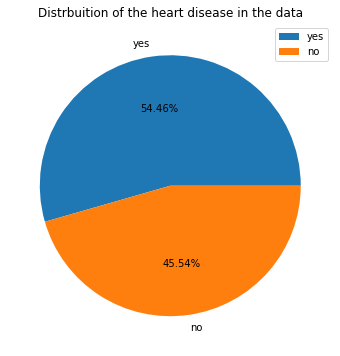

In [35]:
plt.figure(figsize=(12,6))
yes = df2.target[df2.target == 'yes'].count()
no = df2.target[df2.target == 'no'].count()
plt.title("Distrbuition of the heart disease in the data")
labels = ['yes', 'no']
plt.pie([yes, no], labels=labels, autopct="%.2f%%")
plt.legend()
plt.show()

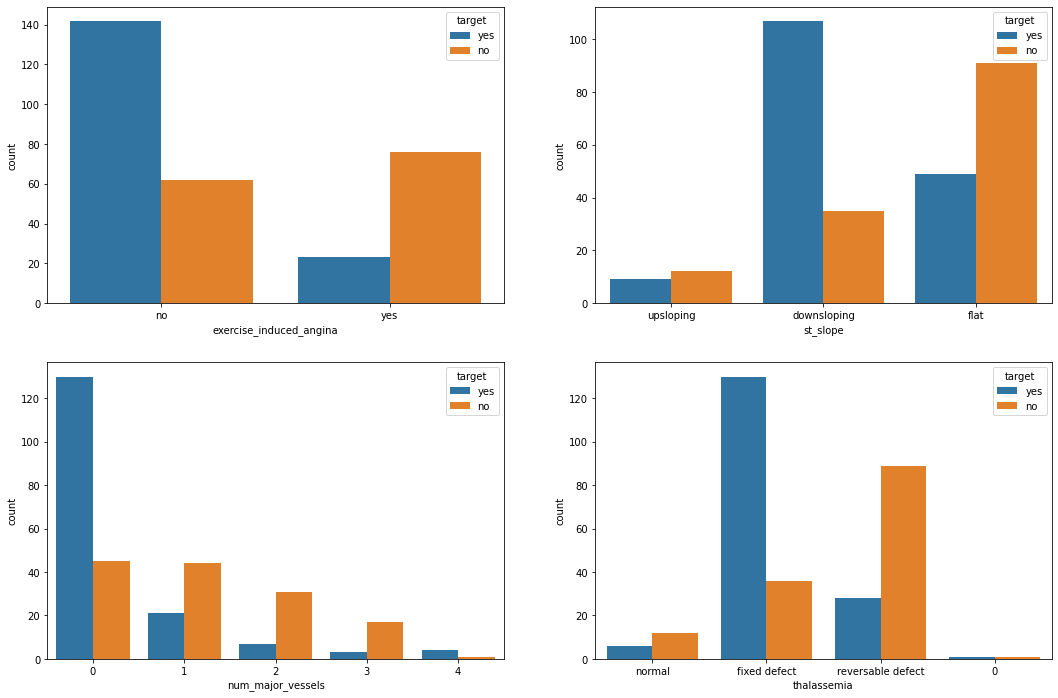

In [36]:
plt.figure(figsize=(18,12))
plt.subplot(2,2,1)
sns.countplot(x='exercise_induced_angina', hue='target', data=df2)

plt.subplot(2,2,2)
sns.countplot(x='st_slope', hue='target',data=df2)

plt.subplot(2,2,3)
sns.countplot(x='num_major_vessels', hue='target',data=df2)

plt.subplot(2,2,4)
sns.countplot(x='thalassemia', hue='target',data=df2)

plt.show()

- in the data  exercise_induced_angina when its value is No, then most people have heart disease, but exercise_induced_angina when its value is Yes, then most people do not have heart disease
- in the data when St_slop is downsloping most pepole are at risk of heart disease otherwise when St_slop is flat most pepole are less likely to get heart disease
- in the data if num_major_vessels = 0 pepole more likely to have heart disease 
- in the data if thalassemia = fixed defect pepole at risk of heart disease otherwise when thalassemia is reversable defect pepole are less likely to get heart disease

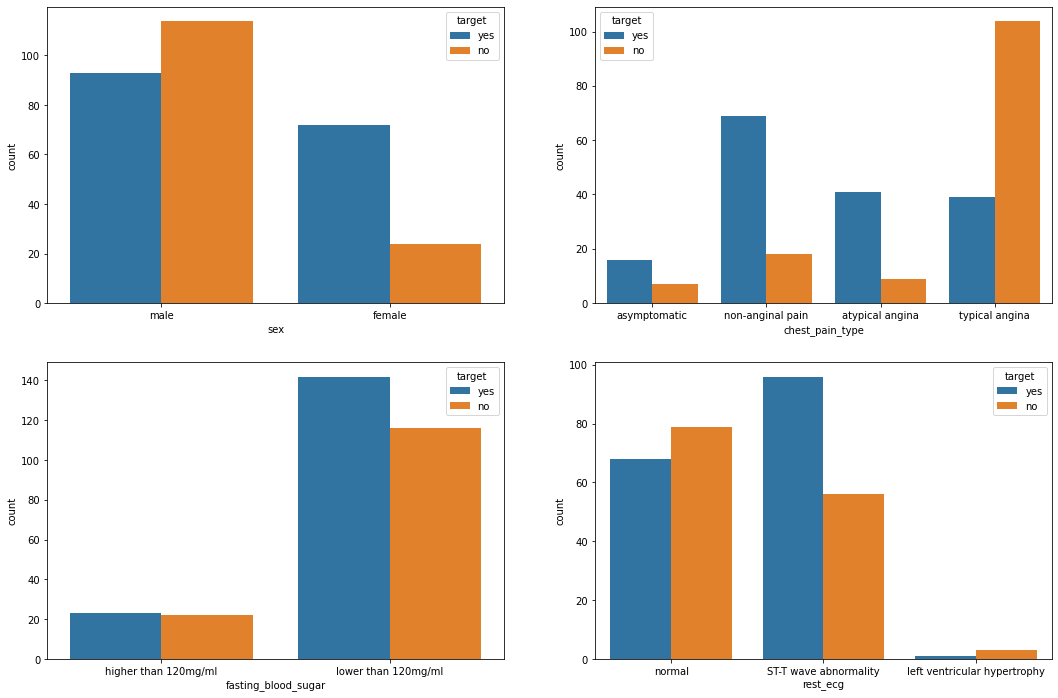

In [37]:
plt.figure(figsize=(18,12))

plt.subplot(2,2,1)
sns.countplot(x='sex', hue='target',data=df2)

plt.subplot(2,2,2)
sns.countplot(x='chest_pain_type', hue='target', data=df2)

plt.subplot(2,2,3)
sns.countplot(x='fasting_blood_sugar', hue='target',data=df2)

plt.subplot(2,2,4)
sns.countplot(x='rest_ecg', hue='target',data=df2)

plt.show()

- in the data There are men who do not have heart disease more than men who have heart disease, on the other hand there are women who have heart disease more than women who do not have heart disease <br>
- in the data People who have typical angina as the chest pain type most likely do not have heart disease, Any other chest pain type, you most likely have heart disease
- in the data You cannot clearly diagnose heart disease by fasting blood sugar
- in the data resesting electromagnetic when  = ST-T wave abnormality Pepole are more likely to have heart disease

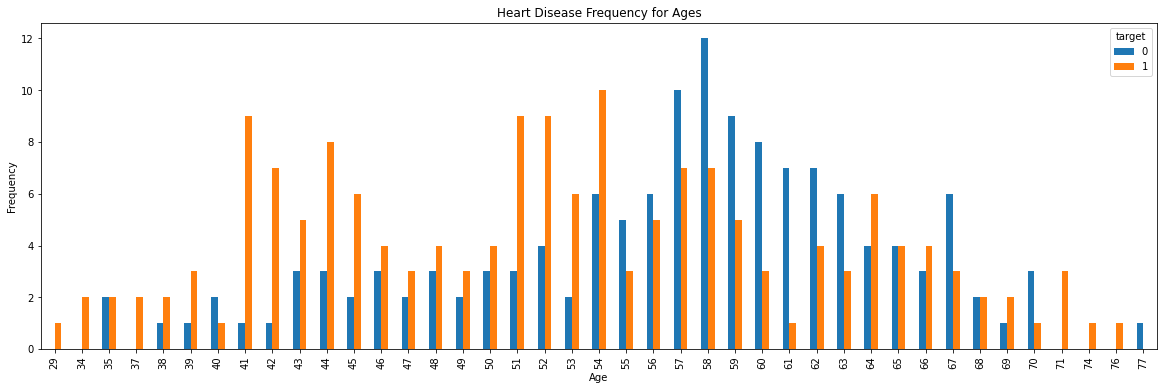

In [38]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [39]:
FEATURES = [col for col in df.columns if col not in ['target']]
FEATURES

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

In [40]:
cat_features = [col for col in FEATURES if df[col].nunique() < 25]
cat_features

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

In [41]:
cont_features = [col for col in FEATURES if df[col].nunique() >= 25 and col not in ['age']]
cont_features

['trestbps', 'chol', 'thalach', 'oldpeak']

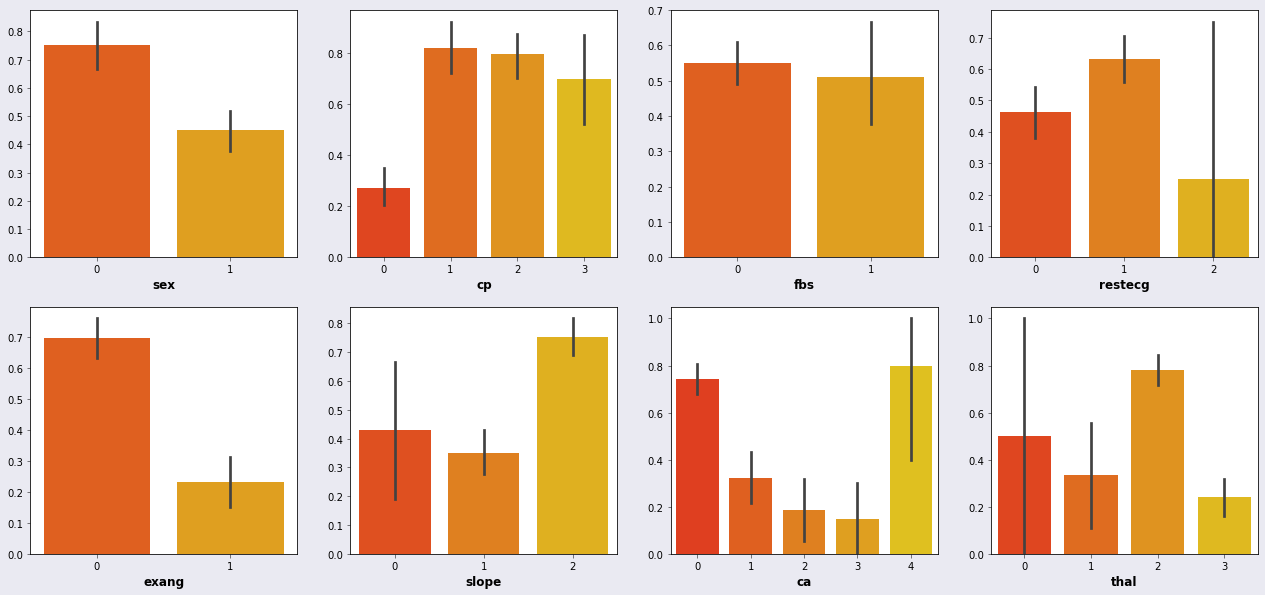

In [42]:
ncols = 4
nrows = int(len(cat_features) / ncols + (len(FEATURES) % ncols > 0))-1

fig, axes = plt.subplots(nrows, ncols, figsize=(22, 10), facecolor='#EAEAF2')

for r in range(nrows):
    for c in range(ncols):
        col = cat_features[r*ncols+c]
        sns.barplot(y=df['target'], x=df[col], ax=axes[r, c], palette='autumn', label='Train data')
        axes[r, c].set_ylabel('')
        axes[r, c].set_xlabel(col, fontsize=12, fontweight='bold')
        axes[r, c].tick_params(labelsize=10, width=0.5)
        axes[r, c].xaxis.offsetText.set_fontsize(6)
        axes[r, c].yaxis.offsetText.set_fontsize(6)
plt.show()

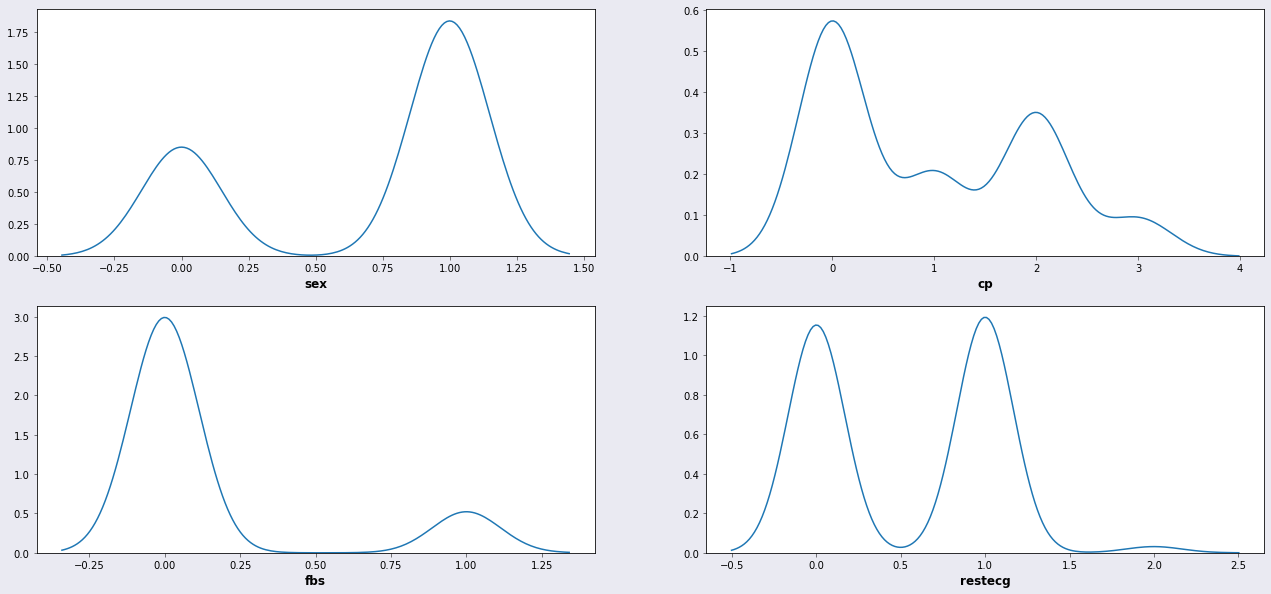

In [43]:
ncols = 2
nrows = int(len(cont_features) / ncols + (len(FEATURES) % ncols > 0))-1

fig, axes = plt.subplots(nrows, ncols, figsize=(22, 10), facecolor='#EAEAF2')

for r in range(nrows):
    for c in range(ncols):
        col = cat_features[r*ncols+c]
        sns.kdeplot(x=df[col], ax=axes[r, c])
        axes[r, c].set_ylabel('')
        axes[r, c].set_xlabel(col, fontsize=12, fontweight='bold')
        axes[r, c].tick_params(labelsize=10, width=0.5)
        axes[r, c].xaxis.offsetText.set_fontsize(6)
        axes[r, c].yaxis.offsetText.set_fontsize(6)
plt.show()

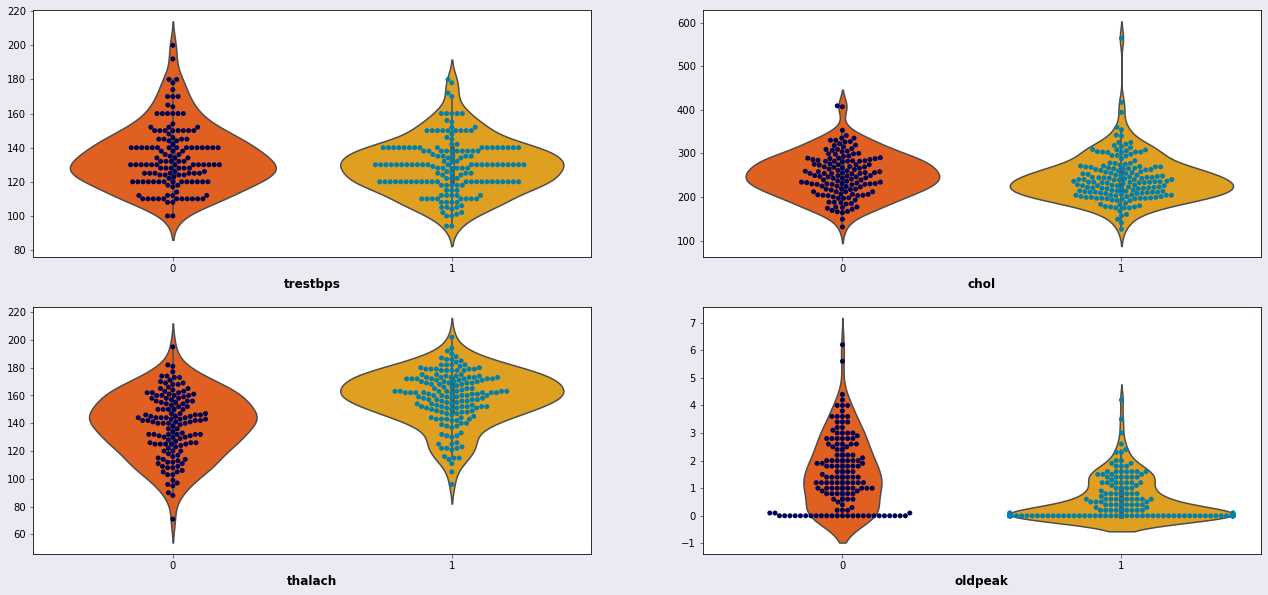

In [44]:
ncols = 2
nrows = int(len(cont_features) / ncols + (len(FEATURES) % ncols > 0))-1

fig, axes = plt.subplots(nrows, ncols, figsize=(22, 10), facecolor='#EAEAF2')

for r in range(nrows):
    for c in range(ncols):
        col = cont_features[r*ncols+c]
        sns.violinplot(y=df[col], x=df['target'],ax=axes[r, c], palette='autumn')
        sns.swarmplot(y=df[col], x=df['target'],ax=axes[r, c], palette='ocean')
        axes[r, c].set_ylabel('')
        axes[r, c].set_xlabel(col, fontsize=12, fontweight='bold')
        axes[r, c].tick_params(labelsize=10, width=0.5)
        axes[r, c].xaxis.offsetText.set_fontsize(6)
        axes[r, c].yaxis.offsetText.set_fontsize(6)
plt.show()

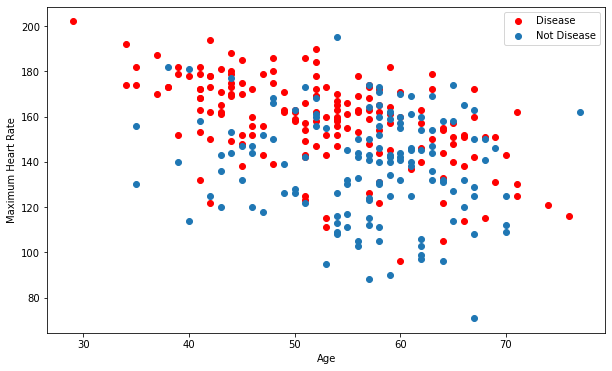

In [45]:
plt.figure(figsize=(10,6))
age_1 = df2.age[df.target==1]
age_0 = df2.age[df.target==0]
max_heart_1 = df2.max_heart_rate_achieved[(df2.target=='yes')]
max_heart_0 = df2.max_heart_rate_achieved[(df2.target=='no')]
plt.scatter(x= age_1, y= max_heart_1, c="red")
plt.scatter(x= age_0, y= max_heart_0)
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

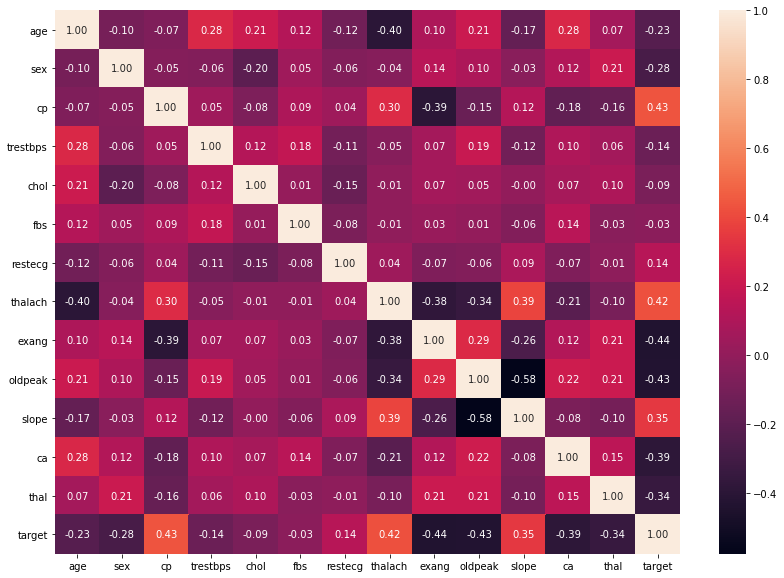

In [46]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), annot=True, fmt='.2f');

<a id='4'></a>
# Apply one hot encoder

In [47]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [48]:
df.shape

(303, 14)

In [49]:
df3 = pd.get_dummies(df2, drop_first=True)

In [50]:
df3.head()

,age,resisting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,fasting_blood_sugar_lower than 120mg/ml,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,exercise_induced_angina_yes,st_slope_flat,st_slope_upsloping,thalassemia_fixed defect,thalassemia_normal,thalassemia_reversable defect,target_yes
0,63,145,233,150,2.3,0,1,0,0,0,0,0,1,0,0,1,0,1,0,1
1,37,130,250,187,3.5,0,1,0,1,0,1,0,0,0,0,1,1,0,0,1
2,41,130,204,172,1.4,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1
3,56,120,236,178,0.8,0,1,1,0,0,1,0,0,0,0,0,1,0,0,1
4,57,120,354,163,0.6,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1


<a id='5'></a>
# Feature Scaling

In [51]:
FEATURES = [col for col in df3.columns if col not in ['target_yes']]

In [52]:
scaler = StandardScaler()
for col in FEATURES:
    df3[col] = scaler.fit_transform(df3[col].to_numpy().reshape(-1,1))
df3.head()

,age,resisting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,fasting_blood_sugar_lower than 120mg/ml,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,exercise_induced_angina_yes,st_slope_flat,st_slope_upsloping,thalassemia_fixed defect,thalassemia_normal,thalassemia_reversable defect,target_yes
0,0.952197,0.763956,-0.256334,0.015443,1.087338,-0.714429,0.681005,-0.444554,-0.634648,-0.945384,-2.394438,-0.115663,1.030158,-0.696631,-0.926766,3.664502,-1.100763,3.979112,-0.793116,1
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,-0.714429,0.681005,-0.444554,1.575677,-0.945384,0.417635,-0.115663,-0.970725,-0.696631,-0.926766,3.664502,0.908461,-0.251312,-0.793116,1
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,-0.714429,-1.468418,2.249444,-0.634648,-0.945384,0.417635,-0.115663,1.030158,-0.696631,-0.926766,-0.272888,0.908461,-0.251312,-0.793116,1
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,-0.714429,0.681005,2.249444,-0.634648,-0.945384,0.417635,-0.115663,-0.970725,-0.696631,-0.926766,-0.272888,0.908461,-0.251312,-0.793116,1
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,-0.714429,-1.468418,-0.444554,-0.634648,1.057772,0.417635,-0.115663,-0.970725,1.435481,-0.926766,-0.272888,0.908461,-0.251312,-0.793116,1


<a id='6'></a>
# Assign Feature and target Variables

In [53]:
X = df3.drop('target_yes', axis=1)
y = df3.target_yes

<a id='7'></a>
# Split the data into training and testing data

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=60)

<a id='8'></a>
# Modeling

In [55]:
def kfolds(model, model_name):
    model = cross_val_score(model, X,y, cv=10)
    model_score = np.average(model)
    print(f"{model_name} score on cross validation: {model_score * 100}%")

def train(model, model_name):
    model.fit(X_train, y_train)
    model_train_score = model.score(X_train, y_train)
    model_test_score = model.score(X_test, y_test)
    print(f"{model_name} model score on Training data: {model_train_score * 100}%\n{model_name} model score on Testing data: {model_test_score * 100}%")

def conf_matrix(model):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True);
    
def class_report(model):
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    
def roc(model, model_name):
    y_pred_svm = model.decision_function(X_test)
    svm_fpr, svm_tpr, _ = roc_curve(y_test, y_pred_svm)
    auc_svm = auc(svm_fpr, svm_tpr)
    plt.figure(figsize=(5, 5), dpi=100)
    plt.plot(svm_fpr, svm_tpr, color="darkorange", label=f'{model_name} (auc = %0.3f)' % auc_svm)
    plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
    plt.xlabel('False Positive Rate -->')
    plt.ylabel('True Positive Rate -->')
    plt.legend()
    plt.show()

<a id='8.1'></a>
## Logistic Regression

In [56]:
lr = LogisticRegression()
kfolds(lr, 'Logistic Regression')
train(lr, 'Logistic Regression')

Logistic Regression score on cross validation: 82.82795698924733%
Logistic Regression model score on Training data: 85.46255506607929%
Logistic Regression model score on Testing data: 84.21052631578947%


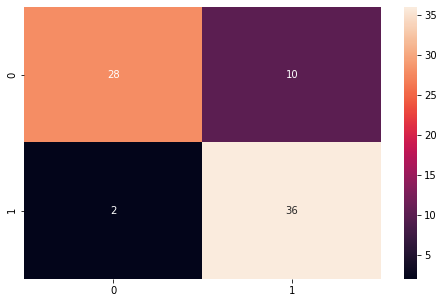

In [57]:
conf_matrix(lr)

In [58]:
class_report(lr)

              precision    recall  f1-score   support

           0       0.93      0.74      0.82        38
           1       0.78      0.95      0.86        38

    accuracy                           0.84        76
   macro avg       0.86      0.84      0.84        76
weighted avg       0.86      0.84      0.84        76



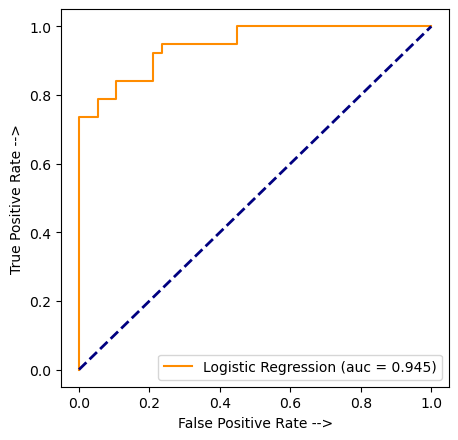

In [59]:
roc(lr, "Logistic Regression")

<a id='8.2'></a>
## Random Forest

In [60]:
rf = RandomForestClassifier(n_estimators=100, random_state=110)
kfolds(rf, "Random Forest")
train(rf, "Random Forest")

Random Forest score on cross validation: 82.80645161290323%
Random Forest model score on Training data: 100.0%
Random Forest model score on Testing data: 88.1578947368421%


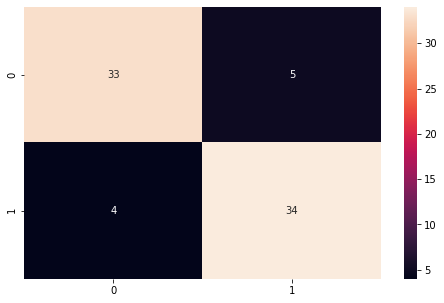

In [61]:
conf_matrix(rf)

In [62]:
class_report(rf)

              precision    recall  f1-score   support

           0       0.89      0.87      0.88        38
           1       0.87      0.89      0.88        38

    accuracy                           0.88        76
   macro avg       0.88      0.88      0.88        76
weighted avg       0.88      0.88      0.88        76



<a id='8.3'></a>
## KNN

In [63]:
knn = KNeighborsClassifier(n_neighbors=3)
kfolds(knn, "KNN")
train(knn, "KNN")

KNN score on cross validation: 80.18279569892472%
KNN model score on Training data: 86.34361233480176%
KNN model score on Testing data: 88.1578947368421%


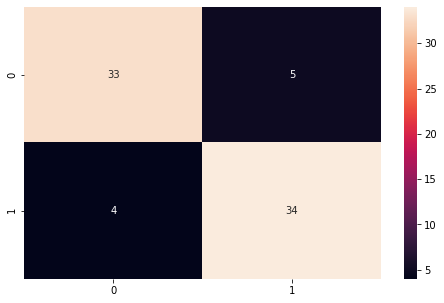

In [64]:
conf_matrix(knn)

In [65]:
class_report(knn)

              precision    recall  f1-score   support

           0       0.89      0.87      0.88        38
           1       0.87      0.89      0.88        38

    accuracy                           0.88        76
   macro avg       0.88      0.88      0.88        76
weighted avg       0.88      0.88      0.88        76



<a id='8.4'></a>
## Bagging

In [66]:
bagg = BaggingClassifier(n_estimators=100, random_state=70)
kfolds(bagg, 'Bagging')
train(bagg, "Bagging")

Bagging score on cross validation: 79.79569892473117%
Bagging model score on Training data: 100.0%
Bagging model score on Testing data: 85.52631578947368%


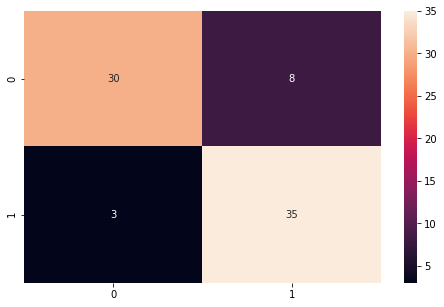

In [67]:
conf_matrix(bagg)

In [68]:
class_report(bagg)

              precision    recall  f1-score   support

           0       0.91      0.79      0.85        38
           1       0.81      0.92      0.86        38

    accuracy                           0.86        76
   macro avg       0.86      0.86      0.85        76
weighted avg       0.86      0.86      0.85        76



<a id='8.5'></a>
## Gradient Boosting

In [69]:
gb = GradientBoostingClassifier()
kfolds(gb, "Gradient Boosting")
train(gb, "Gradient Boosting")

Gradient Boosting score on cross validation: 81.13978494623657%
Gradient Boosting model score on Training data: 100.0%
Gradient Boosting model score on Testing data: 81.57894736842105%


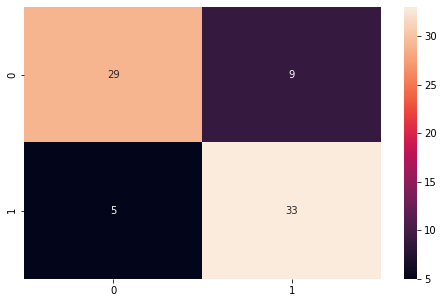

In [70]:
conf_matrix(gb)

In [71]:
class_report(gb)

              precision    recall  f1-score   support

           0       0.85      0.76      0.81        38
           1       0.79      0.87      0.82        38

    accuracy                           0.82        76
   macro avg       0.82      0.82      0.82        76
weighted avg       0.82      0.82      0.82        76



<a id='8.6'></a>
## Decision Tree

In [72]:
dt = DecisionTreeClassifier(criterion='entropy')
kfolds(dt, 'Decision Tree')
train(dt, "Decision Tree")

Decision Tree score on cross validation: 72.53763440860214%
Decision Tree model score on Training data: 100.0%
Decision Tree model score on Testing data: 75.0%


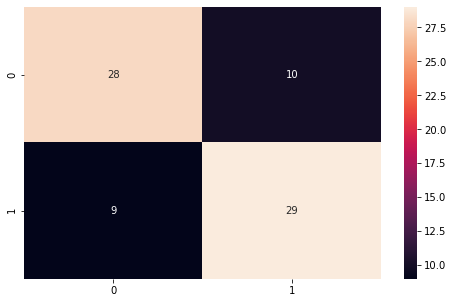

In [73]:
conf_matrix(dt)

In [74]:
class_report(dt)

              precision    recall  f1-score   support

           0       0.76      0.74      0.75        38
           1       0.74      0.76      0.75        38

    accuracy                           0.75        76
   macro avg       0.75      0.75      0.75        76
weighted avg       0.75      0.75      0.75        76



<a id='8.7'></a>
## SVM

In [75]:
svm = SVC(kernel='poly', gamma='auto', C=2)
kfolds(svm, "SVM")
train(svm, "SVM")

SVM score on cross validation: 81.87096774193549%
SVM model score on Training data: 92.07048458149781%
SVM model score on Testing data: 88.1578947368421%


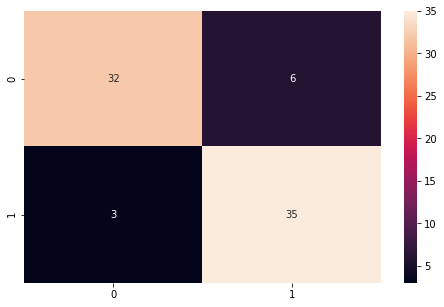

In [76]:
conf_matrix(svm)

In [77]:
class_report(svm)

              precision    recall  f1-score   support

           0       0.91      0.84      0.88        38
           1       0.85      0.92      0.89        38

    accuracy                           0.88        76
   macro avg       0.88      0.88      0.88        76
weighted avg       0.88      0.88      0.88        76



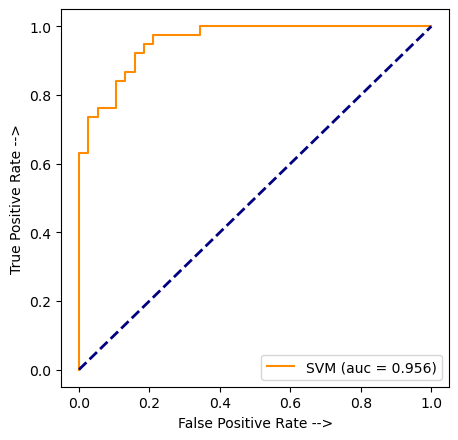

In [79]:
roc(svm, "SVM")

<a id='9'></a>
# TP, TN, FP, FN

In [83]:
def tp(model, model_name):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    TN = cm[0][0]
    FN = cm[1][0]
    TP = cm[1][1]
    FP = cm[0][1]
    ACC = (TP+TN)/(TP+FP+FN+TN)
    TPR = TP/(TP+FN)
    TNR = TN/(TN+FP) 
    PPV = TP/(TP+FP)
    NPV = TN/(TN+FN)
    FPR = FP/(FP+TN)
    FNR = FN/(TP+FN)
    FDR = FP/(TP+FP)

    print(f"TP, FN, TP, FP Overall Accuarcy of {model_name}: {ACC*100}%")
    print(f"Sensitivity Accuarcy of {model_name}: {TPR * 100}%")
    print(f"Specificity Negative Rate Accuarcy of {model_name}: {TNR * 100}%")
    print(f"Negative predictive value Accuarcy of {model_name}: {NPV * 100}%")
    print(f"Fall out Accuarcy of {model_name}: {FPR * 100}%")
    print(f"False negative rate Accuarcy of {model_name}: {FNR * 100}%")
    print(f"False discovery rate Accuarcy of {model_name}: {FDR * 100}%")

<a id='9.1'></a>
## Logistic Regression

In [84]:
tp(lr, "Logistic Regression")

TP, FN, TP, FP Overall Accuarcy of Logistic Regression: 84.21052631578947%
Sensitivity Accuarcy of Logistic Regression: 94.73684210526315%
Specificity Negative Rate Accuarcy of Logistic Regression: 73.68421052631578%
Negative predictive value Accuarcy of Logistic Regression: 93.33333333333333%
Fall out Accuarcy of Logistic Regression: 26.31578947368421%
False negative rate Accuarcy of Logistic Regression: 5.263157894736842%
False discovery rate Accuarcy of Logistic Regression: 21.73913043478261%


<a id='9.2'></a>
## Random Forest

In [85]:
tp(rf, "Random Forest")

TP, FN, TP, FP Overall Accuarcy of Random Forest: 88.1578947368421%
Sensitivity Accuarcy of Random Forest: 89.47368421052632%
Specificity Negative Rate Accuarcy of Random Forest: 86.8421052631579%
Negative predictive value Accuarcy of Random Forest: 89.1891891891892%
Fall out Accuarcy of Random Forest: 13.157894736842104%
False negative rate Accuarcy of Random Forest: 10.526315789473683%
False discovery rate Accuarcy of Random Forest: 12.82051282051282%


<a id='9.3'></a>
## KNN

In [86]:
tp(knn, "KNN")

TP, FN, TP, FP Overall Accuarcy of KNN: 88.1578947368421%
Sensitivity Accuarcy of KNN: 89.47368421052632%
Specificity Negative Rate Accuarcy of KNN: 86.8421052631579%
Negative predictive value Accuarcy of KNN: 89.1891891891892%
Fall out Accuarcy of KNN: 13.157894736842104%
False negative rate Accuarcy of KNN: 10.526315789473683%
False discovery rate Accuarcy of KNN: 12.82051282051282%


<a id='9.4'></a>
## Bagging

In [87]:
tp(bagg, "Bagging")

TP, FN, TP, FP Overall Accuarcy of Bagging: 85.52631578947368%
Sensitivity Accuarcy of Bagging: 92.10526315789474%
Specificity Negative Rate Accuarcy of Bagging: 78.94736842105263%
Negative predictive value Accuarcy of Bagging: 90.9090909090909%
Fall out Accuarcy of Bagging: 21.052631578947366%
False negative rate Accuarcy of Bagging: 7.894736842105263%
False discovery rate Accuarcy of Bagging: 18.6046511627907%


<a id='9.5'></a>
## Gradient Boosting

In [88]:
tp(gb, "Gradient Boosting")

TP, FN, TP, FP Overall Accuarcy of Gradient Boosting: 81.57894736842105%
Sensitivity Accuarcy of Gradient Boosting: 86.8421052631579%
Specificity Negative Rate Accuarcy of Gradient Boosting: 76.31578947368422%
Negative predictive value Accuarcy of Gradient Boosting: 85.29411764705883%
Fall out Accuarcy of Gradient Boosting: 23.684210526315788%
False negative rate Accuarcy of Gradient Boosting: 13.157894736842104%
False discovery rate Accuarcy of Gradient Boosting: 21.428571428571427%


<a id='9.6'></a>
## Decision Tree

In [89]:
tp(dt, "Decision Tree")

TP, FN, TP, FP Overall Accuarcy of Decision Tree: 75.0%
Sensitivity Accuarcy of Decision Tree: 76.31578947368422%
Specificity Negative Rate Accuarcy of Decision Tree: 73.68421052631578%
Negative predictive value Accuarcy of Decision Tree: 75.67567567567568%
Fall out Accuarcy of Decision Tree: 26.31578947368421%
False negative rate Accuarcy of Decision Tree: 23.684210526315788%
False discovery rate Accuarcy of Decision Tree: 25.64102564102564%


<a id='9.7'></a>
## SVM

In [90]:
tp(svm, "SVM")

TP, FN, TP, FP Overall Accuarcy of SVM: 88.1578947368421%
Sensitivity Accuarcy of SVM: 92.10526315789474%
Specificity Negative Rate Accuarcy of SVM: 84.21052631578947%
Negative predictive value Accuarcy of SVM: 91.42857142857143%
Fall out Accuarcy of SVM: 15.789473684210526%
False negative rate Accuarcy of SVM: 7.894736842105263%
False discovery rate Accuarcy of SVM: 14.634146341463413%


# Automated ML

In [92]:
autoML = TPOTClassifier(generations=10, population_size=200, cv=20, verbosity=2)
train(autoML, "Automated ML")

Optimization Progress:   0%|          | 0/2200 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8594696969696971

Generation 2 - Current best internal CV score: 0.8594696969696971

Generation 3 - Current best internal CV score: 0.8594696969696971

Generation 4 - Current best internal CV score: 0.8594696969696971

Generation 5 - Current best internal CV score: 0.8594696969696971

Generation 6 - Current best internal CV score: 0.8594696969696971

Generation 7 - Current best internal CV score: 0.8640151515151515

Generation 8 - Current best internal CV score: 0.8640151515151515

Generation 9 - Current best internal CV score: 0.8640151515151515

Generation 10 - Current best internal CV score: 0.8640151515151515

Best pipeline: KNeighborsClassifier(RobustScaler(LinearSVC(input_matrix, C=25.0, dual=True, loss=hinge, penalty=l2, tol=1e-05)), n_neighbors=55, p=2, weights=distance)
Automated ML model score on Training data: 100.0%
Automated ML model score on Testing data: 81.57894736842105%


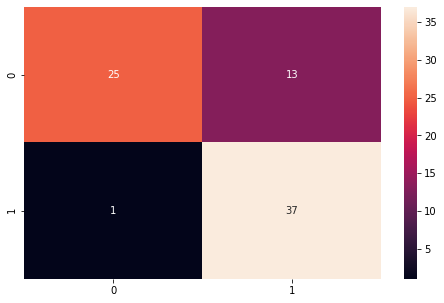

In [93]:
conf_matrix(autoML)

In [94]:
class_report(autoML)

              precision    recall  f1-score   support

           0       0.96      0.66      0.78        38
           1       0.74      0.97      0.84        38

    accuracy                           0.82        76
   macro avg       0.85      0.82      0.81        76
weighted avg       0.85      0.82      0.81        76



In [95]:
tp(autoML, "Automated Machine Learning")

TP, FN, TP, FP Overall Accuarcy of Automated Machine Learning: 81.57894736842105%
Sensitivity Accuarcy of Automated Machine Learning: 97.36842105263158%
Specificity Negative Rate Accuarcy of Automated Machine Learning: 65.78947368421053%
Negative predictive value Accuarcy of Automated Machine Learning: 96.15384615384616%
Fall out Accuarcy of Automated Machine Learning: 34.21052631578947%
False negative rate Accuarcy of Automated Machine Learning: 2.631578947368421%
False discovery rate Accuarcy of Automated Machine Learning: 26.0%
